In [12]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np 
import matplotlib.pyplot as plt

C:\Users\ntk00\AppData\Local\Temp\ipykernel_6452\4200794612.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


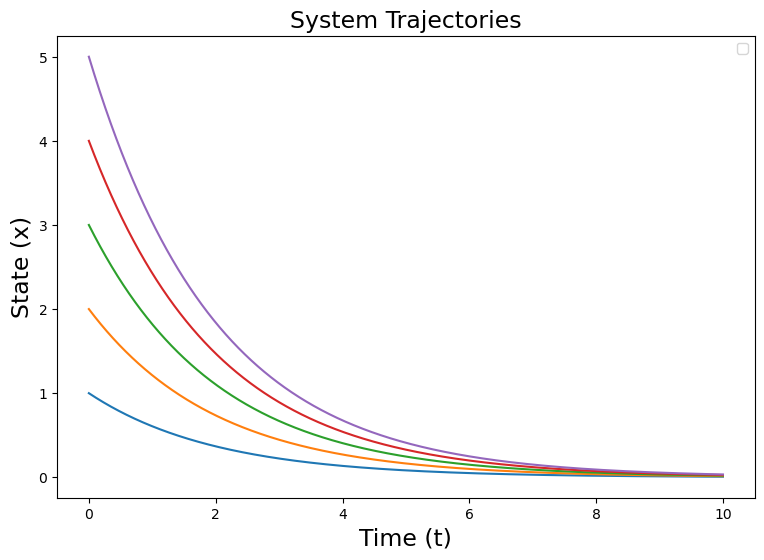

In [22]:
# Data
t_vals = np.arange(0, 10, 0.001) 
x0_vals = [1, 2, 3, 4, 5]

# Initialize matrix to store trajectories
Y = np.zeros((len(t_vals), len(x0_vals)))  # (11, 5)
X = t_vals.reshape(-1, 1)  # (11, 1)

# Generate trajectories
for i, x0 in enumerate(x0_vals):
    for j, t in enumerate(t_vals):
        Y[j, i] = x0 * np.exp(-0.5 * t)  # Direct calculation for each time point

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

plt.figure(figsize=(9, 6))
for i in range(5):
    plt.plot(t_vals, Y[:, i])
plt.xlabel('Time (t)', fontsize=17)
plt.ylabel('State (x)', fontsize=17)
plt.title('System Trajectories', fontsize=17)
plt.legend()
plt.show()

In [23]:
inputs = Input(shape=(1,))
x_dense = Dense(64, activation='sigmoid')(inputs)
x_dense = Dense(64, activation='sigmoid')(x_dense)
outputs = Dense(5)(x_dense)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, validation_split=0.2)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5142 - val_loss: 0.0592
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.0454 - val_loss: 0.0131
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0089 - val_loss: 0.0030
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.0023 - val_loss: 0.0015
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 9.9715e-04 - val_loss: 9.0728e-04
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 7.8555e-04 - val_loss: 7.6248e-04
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 6.0666e-04 - val_loss: 5.2719e-04
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 4.6553e-04 - val_loss: 4.5303e-04
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 3.6165e-04 - val_loss: 3.6496e-04
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 3.0209e

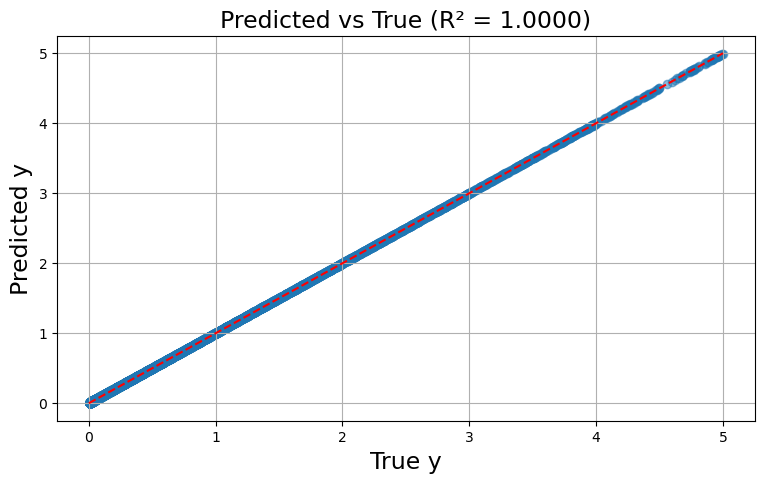

In [26]:
plt.figure(figsize=(9, 5))
# for i in range(5):
#     plt.scatter(X_test, y_test[:, i], alpha= 0.1)
#     plt.scatter(X_test, y_pred[:, i], marker='.')
# plt.title(f"Predicted vs True (R² = {r2:.4f})", fontsize=17)
# plt.legend([f'x0 = {x0}' for x0 in x0_vals], fontsize=17)
# plt.xlabel('Time (t)', fontsize=17)
# plt.ylabel('States (x)', fontsize=17)

plt.scatter(y_test, y_pred.flatten(), alpha=0.5)  # flatten the predictions
plt.plot([0, 5], [0, 5], 'r--')
plt.title(f"Predicted vs True (R² = {r2:.4f})", fontsize=17)
plt.xlabel("True y", fontsize=17)
plt.ylabel("Predicted y", fontsize=17)
plt.grid()

In [16]:
N = 1000
x = np.random.uniform(-5, 5, size=(N, 1))
u = np.random.uniform(-10, 10, size=(N, 1))

x_next = x + 0.5 * u

X = np.hstack([x, u]) 
y = x_next

np.shape(X), np.shape(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
inputs = Input(shape=(2,))
x_dense = Dense(2, activation='linear')(inputs)
outputs = Dense(1)(x_dense)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=100, validation_split=0.2)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.3583 - val_loss: 26.9415
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.2569 - val_loss: 23.2778
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.9148 - val_loss: 20.2464
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.6875 - val_loss: 17.6310
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.0266 - val_loss: 15.4688
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.1796 - val_loss: 13.5824
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.1259 - val_loss: 12.0108
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.8495 - val_loss: 10.6811
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5024 - val_loss: 9.5377
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9794 - val_loss: 8.5354
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0102 - val_loss: 7.7108
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

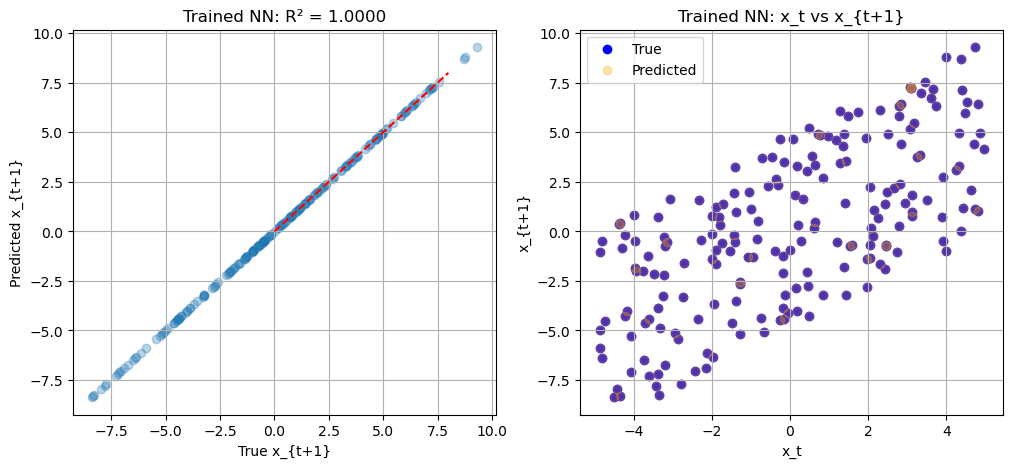

In [18]:
# Plot results
plt.figure(figsize=(12, 5))

# Trained NN results
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0,8], [0,8], 'r--')
plt.xlabel('True x_{t+1}')
plt.ylabel('Predicted x_{t+1}')
plt.title(f'Trained NN: R² = {r2:.4f}')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(x_test[:, 0], y_test, label='True', color= 'blue')
plt.scatter(x_test[:, 0], y_pred, alpha=0.3, label='Predicted', color='orange')
plt.xlabel('x_t')
plt.ylabel('x_{t+1}')
plt.title('Trained NN: x_t vs x_{t+1}')
plt.grid()
plt.legend()

In [19]:
inputs = Input(shape=(2,))
x_dense = Dense(1, use_bias=True)(inputs)  
manual_model = Model(inputs=inputs, outputs=x_dense)

weights = np.array([[1.0],    # State 
                    [0.5]])   # Control 
bias = np.array([0.0])       
manual_model.layers[1].set_weights([weights, bias])

y_pred_manual = manual_model.predict(x_test)
r2_manual = r2_score(y_test, y_pred_manual)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


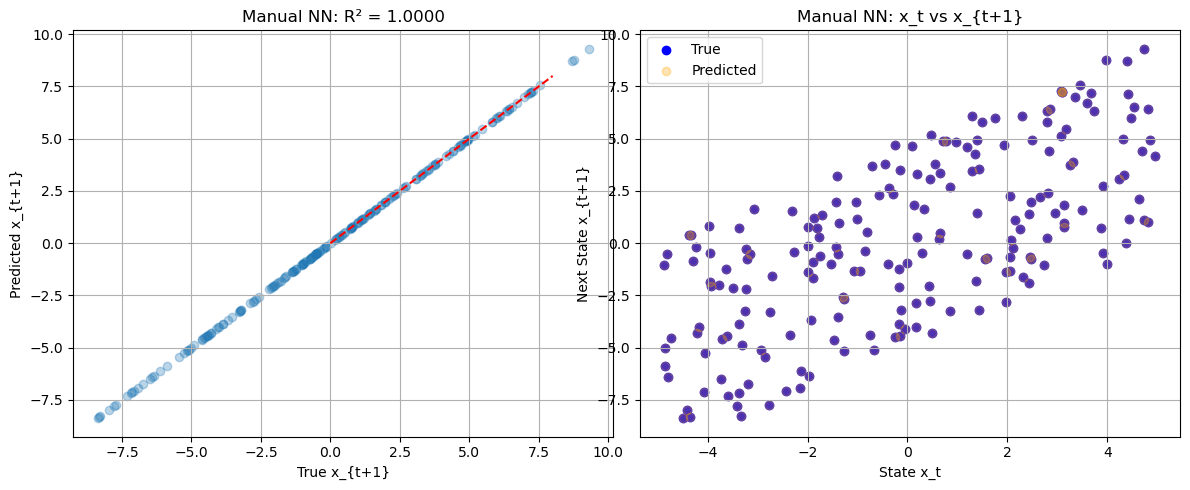

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, alpha=0.3)
plt.plot([0,8], [0,8], 'r--')
plt.xlabel('True x_{t+1}')
plt.ylabel('Predicted x_{t+1}')
plt.title(f'Manual NN: R² = {r2_manual:.4f}')
plt.grid()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(x_test[:, 0], y_test, label='True', color='blue')
plt.scatter(x_test[:, 0], y_pred_manual, alpha=0.3, label='Predicted', color='orange')
plt.title('Manual NN: x_t vs x_{t+1}')
plt.xlabel('State x_t')
plt.ylabel('Next State x_{t+1}')
plt.legend()
plt.grid()